## Classification Assignment- Logistic Regression

### Student ID: 2021AIML064
### Student Name: Jagadish Yalla

## Importing libraries

In [1]:
import numpy as np                   
import pandas as pd                   
import matplotlib.pyplot as plt       
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv("advertising.csv")


**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram of the Age**

Age of the oldest person: 61 Years
Age of the youngest person: 19 Years
Average age in dataset: 36.009 Years


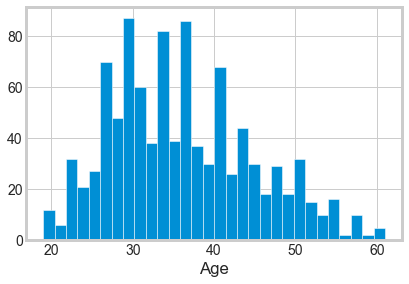

In [6]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

print('Age of the oldest person:', ad_data['Age'].max(), 'Years')
print('Age of the youngest person:', ad_data['Age'].min(), 'Years')
print('Average age in dataset:', ad_data['Age'].mean(), 'Years')

**Here, we can see that most of the internet users are having age in the range of 26 to 42 years.**

**Create a jointplot showing Area Income versus Age.**

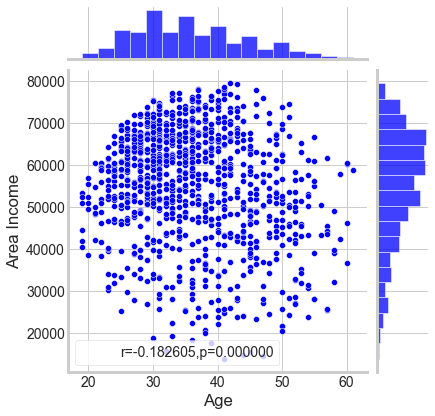

In [7]:
from scipy.stats import pearsonr
graph1=sns.jointplot(x='Age', y='Area Income', color= "blue", data= ad_data)
r, p = stats.pearsonr(ad_data["Age"],ad_data["Area Income"])
phantom, = graph1.ax_joint.plot([],[],linestyle="",alpha=0)
graph1.ax_joint.legend([phantom],['r={:f},p={:f}'.format(r,p)])

#### Here, we can see that mostly teenagers are higher earners with age group of 20-40 earning 50k-70k

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

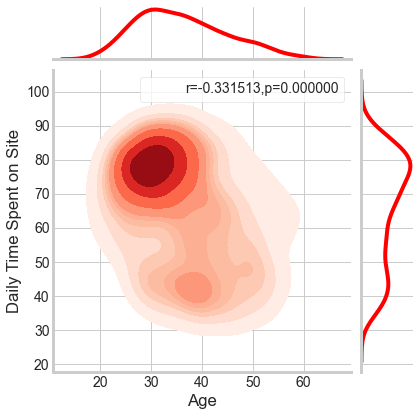

In [8]:
graph1=sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data, kind='kde', color='red', cmap="Reds", shade=True)
r, p = stats.pearsonr(ad_data["Age"],ad_data["Daily Time Spent on Site"])
phantom, = graph1.ax_joint.plot([],[],linestyle="",alpha=0)
graph1.ax_joint.legend([phantom],['r={:f},p={:f}'.format(r,p)])

#### From the above plot its evident that the age group of 25-40 is most active on the internet.

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

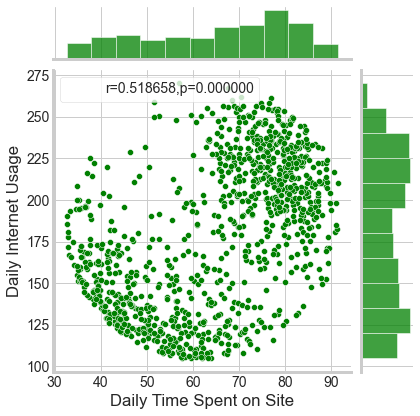

In [9]:
graph1=sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data, color='green')
r, p = stats.pearsonr(ad_data["Daily Time Spent on Site"],ad_data["Daily Internet Usage"])
phantom, = graph1.ax_joint.plot([],[],linestyle="",alpha=0)
graph1.ax_joint.legend([phantom],['r={:f},p={:f}'.format(r,p)])


**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

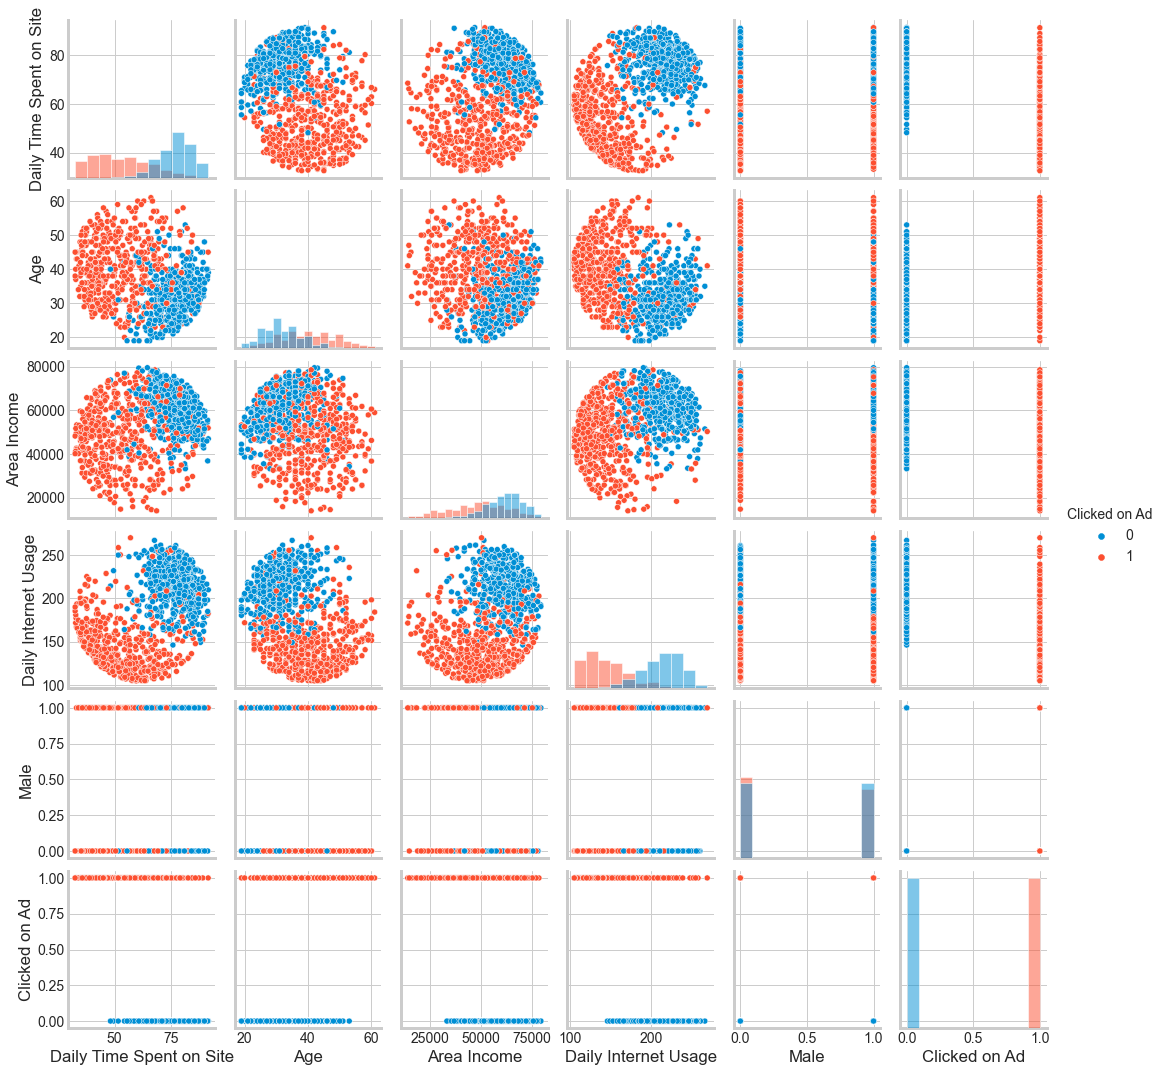

In [10]:
sns.pairplot(ad_data, diag_kind = "hist", vars=['Daily Time Spent on Site','Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad'], hue='Clicked on Ad')

## Feature Selection and  Data Cleaning

In [11]:
pd.crosstab(index=ad_data['Country'],columns='count').sort_values(['count'], ascending=False).head(12)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


#### It seems that users are from all over the world with maximum from france and czech republic with a count of 9 each.

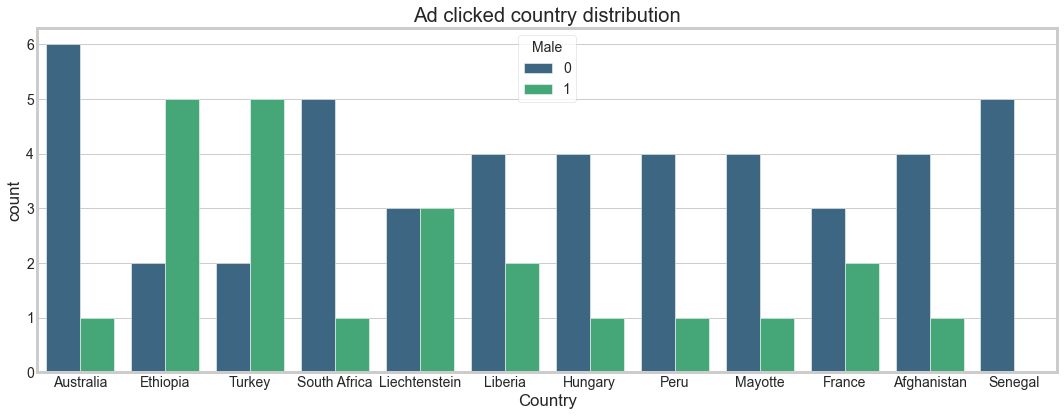

In [12]:
#Distribution of top 12 country's ad clicks based on Sex 
plt.figure(figsize=(15,6))
sns.countplot(x='Country',data=ad_data[ad_data['Clicked on Ad']==1],order=ad_data[ad_data['Clicked on Ad']==1]['Country'].value_counts().index[:12],hue='Male',
              palette='viridis')
plt.title('Ad clicked country distribution')
plt.tight_layout()

#### Most are developing countries and females are the active contributors

In [13]:
# change the datetime object
ad_data['Timestamp']=pd.to_datetime(ad_data['Timestamp'])

In [14]:
#Now we shall introduce new columns Hour,Day of Week, Date, Month from timestamp
ad_data['Hour']=ad_data['Timestamp'].apply(lambda time : time.hour)
ad_data['Day']=ad_data['Timestamp'].apply(lambda time : time.day)
ad_data['DayofWeek'] = ad_data['Timestamp'].apply(lambda time : time.dayofweek)
ad_data['Month'] = ad_data['Timestamp'].apply(lambda time : time.month)
ad_data['Date'] = ad_data['Timestamp'].apply(lambda t : t.date())

In [15]:
ad_data['Ad Topic Line'].nunique()

1000

In [16]:
## All ad topics are different which makes it really difficult to feed for model.
## 'City' and the 'Nation', we can supplant them by dummy variables with numerical features, Nonetheless, along these lines we got such a large number of new highlights.
##Or we can apply label encoder

In [17]:
#Lets take country value as dummies
country= pd.get_dummies(ad_data['Country'],drop_first=True)

In [18]:
#Now lets join the dummy values
ad_data = pd.concat([ad_data,country],axis=1)

In [19]:
#Now lets drop the columns not required for building a model
ad_data.drop(['Ad Topic Line','City','Country','Timestamp','Date'],axis=1,inplace=True)


In [20]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,Day,DayofWeek,Month,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000,11.660000,15.484000,3.064000,3.817000,...,0.005000,0.002000,0.006000,0.007000,0.003000,0.004000,0.007000,0.003000,0.004000,0.006000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025,6.960952,8.734073,1.998474,1.926973,...,0.070569,0.044699,0.077266,0.083414,0.054717,0.063151,0.083414,0.054717,0.063151,0.077266
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,6.000000,8.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,12.000000,15.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,18.000000,23.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,23.000000,31.000000,6.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

In [21]:
## im not considering dummy variabes and time features as accuracy is not great with including them im model

**Split the data into training set and testing set using train_test_split**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X= ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(670, 5) (670,)
(330, 5) (330,)


**Train and fit a logistic regression model on the training set.**

In [26]:
from sklearn.linear_model import LogisticRegression


In [27]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\JAGADISH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions and Evaluations
**Now predict values for the testing data.**

In [28]:
predictions = logmodel.predict(X_test)

**Create a classification report for the model.**

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.97      0.98       159

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



In [31]:
print(confusion_matrix(y_test, predictions))

[[170   1]
 [  5 154]]


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print('Logistic regression accuracy:', accuracy_score(predictions, y_test)*100)

Logistic regression accuracy: 98.18181818181819


# Naive Bayes Classifier

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on with proper resoning!

In [34]:
##Im not using country here becuae it has dummy variables and it wont fit with NBS

**Split the data into training set and testing set using train_test_split**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
XNB = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
yNB = ad_data['Clicked on Ad']

In [37]:
XNB_train, XNB_test, yNB_train, yNB_test = train_test_split(XNB, yNB, test_size=0.33, random_state=101)

**Train and fit a Naive Bayes Classifier model on the training set.**

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
nav_bayes_model = GaussianNB()

In [40]:
#nav_bayes_model.fit(XNB_train, yNB_train)
nav_bayes_model.fit(XNB_train, yNB_train)

GaussianNB()

## Predictions and Evaluations
**Now predict values for the testing data.**

In [41]:
#yNB_pred = nav_bayes_model.predict(XNB_test)

yNB_pred = nav_bayes_model.predict(XNB_test)

**Create a classification report for the model.**

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
#print(classification_report(yNB_test,yNB_pred))

print(classification_report(yNB_test,yNB_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       171
           1       0.97      0.97      0.97       159

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



In [44]:
print(confusion_matrix(y_test,yNB_pred))

[[167   4]
 [  5 154]]


In [45]:
from sklearn.metrics import accuracy_score
print('NB accuracy:', accuracy_score(yNB_pred, y_test)*100)

NB accuracy: 97.27272727272728


## Great Job!